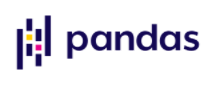

**Sejam todas bem-vindas e bem-vindos de volta!**

Vamos revisar pontos básicos sobre a biblioteca pandas (de operações e manipulações de matrizes de dados ou _dataframes_) do Python 3.x, relembrando:
* Como importar dados para o pandas
* Algumas das principais funções do pandas
* Unir _dataframes_
* Remover dados de um _dataframe_
* Como salvar os dados em arquivos nos formatos mais utilizados


Pandas
---

Para decepção de muitos, o nome da biblioteca Pandas não vem da espécie de ursos mais querida do planeta, mas sim de "_Python Data Analysis_" e "_Panel Data Analysis_" (**PAN**nel **DA**ta analysi**S**).

_Panel Data_ são dados estruturados multidimensionais (ou de n-dimensões). Qualquer lembrança ao `numpy` **não** é mera coincidência, uma vez que o `Pandas` é baseado no `numpy`.

Pandas também é código aberto (_open source_) e grátis para uso (licensa BSD).

Veremos que o `Pandas` facilita bastante uma série de operações que envolvem um volume de dados grande.

# Links Úteis

[Github do projeto Pandas](https://github.com/pandas-dev/pandas)

[Manual em PDF](https://pandas.pydata.org/docs/pandas.pdf) (+3000 páginas)

[Página do projeto](https://pandas.pydata.org/docs/)

# Importação

# Importando o `pandas`

Normalmente importaremos o `pandas` com o "apelido" `pd`, e isso é feito da seguinte forma:

```python
import pandas as pd
```

In [ ]:
import pandas as pd
# costuma-se fazer também a importação do numpy junto com a do pandas porque
# acaba que vez-ou-outra é necessário utilizar algo do numpy, então vamos
# seguir essa tradição aqui
import numpy as np

O Pandas nos permite trabalhar com dados no Python de forma semelhante ao que encontramos em uma tabela ou planilha (Excel, por exemplo).

De forma simples, o Pandas permite que trabalhemos com dados em matrizes (similares às do NumPy), porém permite que os dados sejam de certa forma "agrupados" por um cabeçalho, tanto por linhas, quanto por colunas.

Normalmente as linhas estão apenas numeradas (indexadas), mas isso não é uma regra.

Os "objetos" principais com os quais trabalhamos no Pandas são:
* dados - são os valores, as células ou os itens em uma série (coluna)
* `pd.Series` - são as séries, colunas ou conjunto de dados em uma coluna
* `pd.DataFrame` - é a planilha, tabela ou conjunto de `pd.Series`


# **`pd.Series`**

## Criando um `pd.Series` simples

In [ ]:
a = pd.Series([1, 2,5, 6, 9, 14, 32, 42])
a

Perceba que, ao criarmos uma série a partir de uma lista ( `[1, 2]` ) e chamá-la, o colab exibe 4 valores e 1 texto:
```
0    1
1    2
dtype: int64
```
Mas como aconteceu de inserirmos 2 números e visualizarmos 4?

Acontece que a **primeira coluna** exibida são so índices das **linhas** onde estão os dados, ou seja:
* o valor **`1`** está no índice `0`.
* o valor **`2`** está no índice `1`.

A última linha nos informa que os dados nesta série (`pd.Series()`) são inteiros (`int`) de 64-bits de tamanho máximo (`64`).

`dtype` é o mesmo que vimos no `numpy`, ele se refere ao **tipo de dado** ou **D**ata **TYPE** (do inglês).

Bom, mas esses dados não têm cabeçalho, certo? Isso aconteceu porque criamos a série a partir de uma lista e não informamos o cabeçalho.

Podemos fazer isso de duas formas:

## Adicionando cabeçalho ao `pd.Series`

In [ ]:
# Vamos ver se a série 'a' tem um NOME (ou cabeçalho)
print(a.name)

In [ ]:
# Vamos tentar atribuir um NOME à série 'a'
a.name = "números"

In [ ]:
# Vejamos se mudou algo na exibição do colab
a

Repare que na última linha agora aparece:
```
Name: números, ...
```
Vamos tentar imprimir o nome agora:

In [ ]:
print(a.name)

Como a série é uma espécie de `np.array`, vamos tentar ver se conseguimos os mesmos atributos a partir dela:

In [ ]:
a.sum()

In [ ]:
a.mean()

In [ ]:
a.max()

In [ ]:
a.min()

In [ ]:
a.std()

In [ ]:
a.var()

Tudo certo! Os mesmos atributos. Justamente porque o pandas fez com que as séries sejam objetos derivados do numpy e, assim, herdam várias características dele.

Outra forma de criar séries é por meio de dicionários (`dict`).

Vejamos o exemplo:

In [ ]:
b = pd.Series({'a': 1,
               'b': 2,
               'a': 3},
              name="letras")

b

Repare que nesse exemplo duas coisas chamam a atenção:
* os índices agora são `a` e `b`
* já criamos a série com nome de "letras" (que aparece na última linha)

In [ ]:
print(b.name)

## Adicionando dados ao `pd.Series`

### `.append()`

Novamente encontramos as similaridades entre as séries do Pandas e as listas.

Para inserir itens em uma lista, vimos lá atrás o comando `.append()`.

Aqui não é muito diferente. Vejamos o exemplo:

Primeiro vamos adicionar um elemento simples à série mais simples que criamos, chamada `a`.

**O principal DETALHE aqui** é que não conseguimos inserir um objeto simples a uma série, pois ela só consegue "receber" objetos dos tipos:
* `pd.Series`
* `pd.DataFrame`

Se tentarmos um dos códigos **errados** abaixo:
```python
a.append(3)
```
... ou...
```python
a.append('3')
```
... ou mesmo...
```python
a.append([3])
```
... receberemos o erro similar a este:
```
TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid
```
... que significa:
> `não é possível concatenar (adicionar ou juntar) objetos do tipo inteiro (no caso vale também para strings, listas e etc.);`**`apenas objetos Series e DataFrame são válidos`**

Então vamos tentar uma forma direta:

In [ ]:
a

In [ ]:
a = a.append(pd.Series(1))

In [ ]:
a

Repare nas **três últimas caixas de códigos acima** para falarmos sobre **três coisas interessantes** que podemos observar a partir delas e de seus resultados:
1. quando fazemos o `.append(1)` ao `a`, o `1` adicionado aparece no final da série **com índice `0`**
2. o nome da série some da última linha (`Name: números`) no "objeto adicionado"
3. o "resultado" **não fica gravado** em `a`, pois quando a chamamos novamente na terceira caixa de código ela mostra resultado **igual** ao da primeira

Então já observamos que esta função `append()` só retorna o valor alterado, mas não altera o objeto por si só.

Para adicionar um item desta forma, temos que chamá-lo novamente:

In [ ]:
# Se fizermos o simples 'append()'...
a = a.append(pd.Series(1))
a

Repare que o nome da série se perdeu mesmo e o índice ficou errado.

Vamos adicionar mais um item, mas agora adicionando a configuração:

`ignore_index=True`

In [ ]:
a = a.append(pd.Series(2), ignore_index=True)
a

Os índices foram "consertados" Mas a questão do nome se perdeu. Uma forma de "contornar" isso é:

In [ ]:
# recriando nossa série
a = pd.Series([1,2])
# reatribuindo o nome a ela
a.name = "números"

# salvando o nome da série
nome_salvo = a.name

# adicionando os itens à série
a = a.append(pd.Series(1), ignore_index=True)
a = a.append(pd.Series(2), ignore_index=True)

# restaurando o nome da série
a.name = nome_salvo

a

Parece bobagem "salvar" o nome sendo que acabamos de atribuir, mas vamos pensar no caso de precisarmos criar uma função que executa os passos.

In [ ]:
def adiciona_item(serie, itens):
    # salvando o nome da série para ser recuperada
    nome_salvo = a.name

    # adicionando os itens à série
    serie = serie.append(pd.Series(itens), ignore_index=True)

    # restaurando o nome da série
    serie.name = nome_salvo

    return serie

Vamos testar nossa função:

In [ ]:
# recriando nossa série
a = pd.Series([1,2])
# reatribuindo o nome a ela
a.name = "números"

# utilizando nossa função criada
a = adiciona_item(a, [1,2])
a

In [ ]:
# Vamos criar duas séries: 's1' e 's2'
s1 = pd.Series([1, 2, 3])
s2 = pd.Series([4, 5, 6])

# Agora vamos criar uma série definindo seus índices como [3, 4, 5]
s3 = pd.Series([4, 5, 6], index=[3, 4, 5])
s3

In [ ]:
s2

In [ ]:
s1.append(s2)

In [ ]:
s1.append(s3)

## Removendo itens de um `pd.Series`

### **`.drop()`**

O nome do método `drop()` vem do inglês e significa "(deixar) cair", "soltar" ou "largar". Esse método remove itens pelo índice **da série**, ou seja, repare no exemplo abaixo que a "Nova série" ficou sem os índices `[0, 2, 4, 6, 8]`.

In [ ]:
alfabeto   = ["a","b","c","d","e","f","g","h","i","j"]
serie      = pd.Series(alfabeto)
print(alfabeto)
serie

In [ ]:
serie_nova = serie.drop([0, 2, 4, 6, 8])
serie_nova

In [ ]:
alfabeto   = ["a","b","c","d","e","f","g","h","i","j"]
serie      = pd.Series(alfabeto)

serie_nova = serie.drop([0, 2, 4, 6, 8])

print("Série:")
print(serie)

print()

print("Nova série:")
print(serie_nova)

### `.reset_index()`

Para resolver esse caso, usamos o `pd.Series.reset_index()`

In [ ]:
ser = serie_nova.reset_index()
ser

Perceba que ele criou um índice novo correto (coluna mais à esquerda), mas manteve (preservou) o índice antigo com seus respectivos valores e "rotulou" a coluna de `index` e ainda criou um "rótulo" genérico para a coluna das letras, com o nome de "`0`".

Para resolver essa questão, utilizamos a configuração `drop=True` que, parecido com o nome do método `.drop()`, faz o `.reset_index()` "largar" o índice antigo.

Veja abaixo:

In [ ]:
ser = serie_nova.reset_index(drop=True)
ser

### **`.truncate()`**

Já o `.truncate()` **descarta** tudo que está **antes** e **depois** dos índices informados.

É utilizado principalmente quando queremos "cortar" ou "tirar uma fatia" de uma determinada série.

In [ ]:
serie = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]);

print("Série:");
print(serie);

# Truncate the Series to get a new Series
nova_serie = serie.truncate(4, 8, copy=False);

print("Nova série:");
print(nova_serie);

Mas o lance dos índices permaneceu o mesmo que no `.drop()`.

Vamos corrigir:

In [ ]:
ser = nova_serie.reset_index(drop=True)
ser

# `pd.DataFrame`

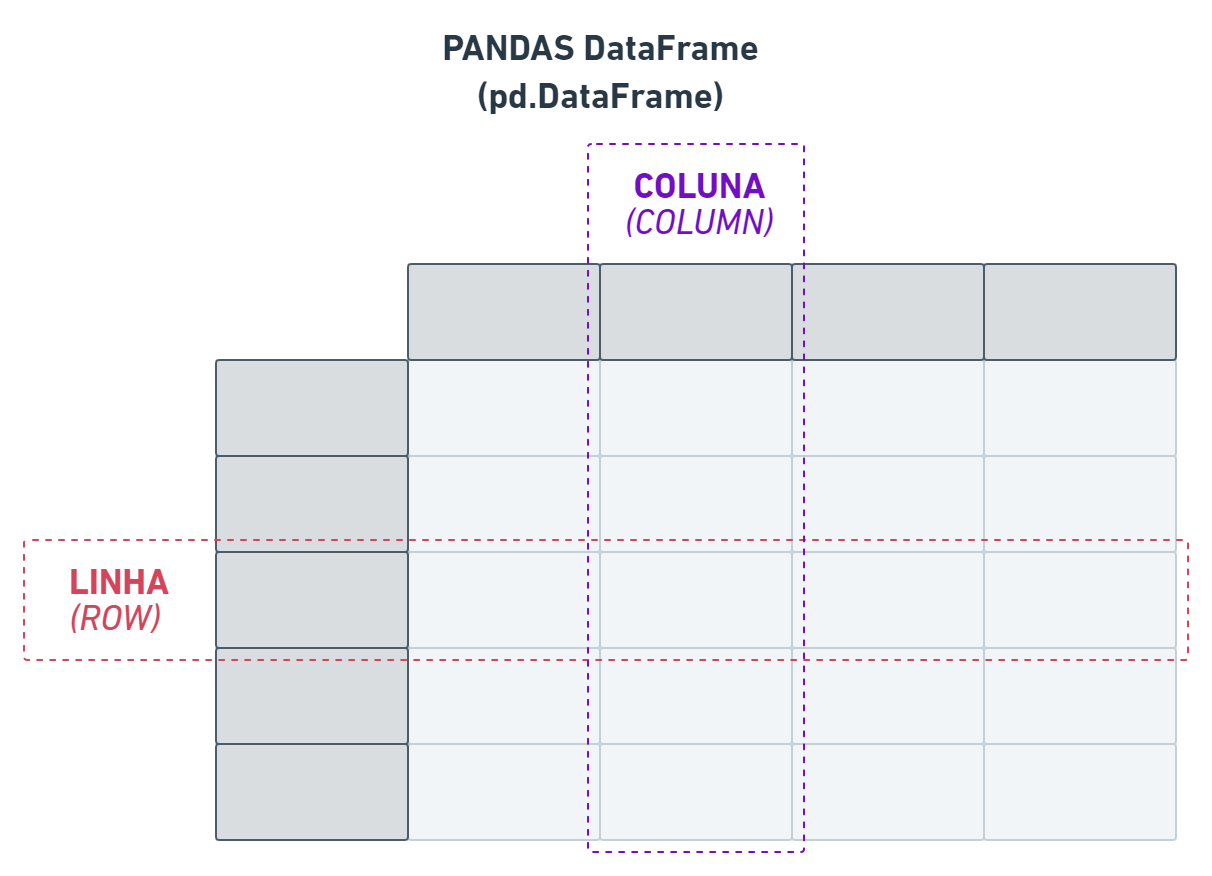

## Criando um `pd.DataFrame`

Vamos agora criar uma tabela completa, ou seja, um `pd.DataFrame`.

In [ ]:
# normalmente chamaremos de 'df' o DataFrame principal que trabalharemos
df = pd.DataFrame({"Nome": ["Ana Barbosa Carvalho",
                            "Danilo Eduardo Fraça",
                            "Gabriela Honório Iglesias"],
                   "Idade": [22,
                             35,
                             58],
                   "Gênero": ["feminino",
                              "masculino",
                              "feminino"],
                   }
                  )

df

Aqui nosso `pd.DataFrame` possui 9 valores distribuidos em 3 registros com 3 tipos de dados cada.

Como a principal vantagem da utilização do Pandas é para utilização com um volume maior de dados, vamos importar alguns dados já existentes e muito utilizados para que possamos ver algumas coisas interessantes:
1. como importar dados de maior tamanho
2. como trabalhar com dados de maior tamanho

Mas antes disso, vamos aprendender a adicionar e remover dados desse `pd.DataFrame` que já criamos.

## Adicionando dados ao `pd.DataFrame`

Primeiro vamos adicionar dados simples a esse último `pd.DataFrame`.

Tudo será bastante parecido com o de `pd.Series`.


### **`.append()`**

Podemos utilizar o `.append()` para adicionar 1 registro ou mais a um `pd.DataFrame` existente.

```python
pd.DataFrame.append(outro_DataFrame,
                    ignore_index=False,
                    verify_integrity=False,
                    sort=False)

# retorna -> pd.DataFrame
```

In [ ]:
?pd.DataFrame.append()

In [ ]:
# Vamos adicionar o registro do 'Jonas' ao pd.DataFrame anterior
df_add = pd.DataFrame({"Nome": "Jonas Kelvin",
                       "Idade": 70,
                       "Gênero": "masculino"},
                      index=[0])

df = df.append(df_add, ignore_index=True)
df

Podemos também adicionar vários registros de uma só vez.

In [ ]:
df_add = pd.DataFrame({"Nome": ["Liliane Machado Nova",
                                "Orlando Patrus Queiroz",
                                "Renata Silva Tardelle",
                                ],
                       "Idade": [68,
                                 53,
                                 25],
                       "Gênero": ["feminino",
                                  "masculino",
                                  "feminino"],
                   }
                  )

df = df.append(df_add, ignore_index=True)
df

Repare que no caso de adicionar vários itens a uma tabela já existente é a mesma coisa que juntar ou unir 2 tabelas. Similar a "empilhar" 2 tabelas.

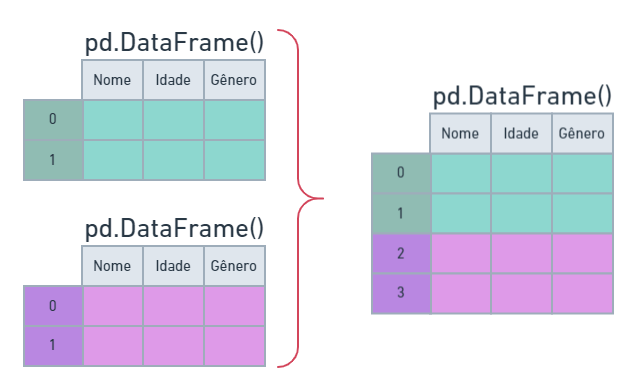

### **`pd.concat()`**

In [ ]:
?pd.concat()

O comando `pd.concat()` é uma função do pandas (ou um método da classe pandas) que realiza a concatenação de dois objetos para formar um `pd.DataFrame`.

Repare que seu `formato` é **`pd`**`.concat()`, ou seja, ele é "aplicado" **fora** do **objeto** (`.Series` ou `.DataFrame`).

Isso siginifica que seu uso é um pouco diferente.

```python
# unindo DUAS LISTAS em um .DataFrame
df = pd.concat([obj_1, obj_2, ..., obj_n], # lista de OBJETOS a serem unidos
               axis=0, # { 0 -> vertical, 1 -> horizontal }
                       # { 0 -> empilha,  1 -> enfileira }
                       # { 0 -> índice,   1 -> coluna }
               join='outer', # {'inner'}
               ignore_index=False,
               keys=None,
               levels=None,
               names=None,
               verify_integrity=False,
               sort=False,
               copy=True)
```

#### Funciona com Séries:

In [ ]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

Para "consertar" o índice, basta adicionar
```python
ignore_index=True
```

In [ ]:
pd.concat([s1, s2],
          ignore_index=True)

Podemos adicionar "níveis" de hierarquia aos dados, atribuindo "chaves" a eles:

In [ ]:
pd.concat([s1, s2], keys=['s1', 's2'])

Podemos mudar o nome do índice:

In [ ]:
pd.concat([s1, s2],
          keys=['s1', 's2'],
          names=['Nome da Série', 'ID da linha'])

#### Funciona com `DataFrame`

Combinando dois `.DataFrame` com as mesmas colunas:

In [ ]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letra', 'número'])
df1

,letra,número
0,a,1
1,b,2


In [ ]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letra', 'número'])
df2

,letra,número
0,c,3
1,d,4


In [ ]:
pd.concat([df1, df2])

,letra,número
0,a,1
1,b,2
0,c,3
1,d,4


**OBSERVAÇÃO:** Se juntarmos dois objetos `.DataFrame` que tenham colunas diferentes, os dados que não existirem em uma serão preenchidos com valores `NaN` (que é tipo um "não existe").

In [ ]:
df3 = pd.DataFrame([['c', 3, 'gato'], ['d', 4, 'cachorro']],
                   columns=['letra', 'número', 'animal'])
df3

,letra,número,animal
0,c,3,gato
1,d,4,cachorro


In [ ]:
pd.concat([df1, df2, df3], sort=False)

,letra,número,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,NaN
1,d,4,NaN
0,c,3,gato
1,d,4,cachorro


In [ ]:
pd.concat([df1, df2, df3])

,letra,número,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,NaN
1,d,4,NaN
0,c,3,gato
1,d,4,cachorro


Utilizando o parâmetro:
```python
join="inner"
```

In [ ]:
pd.concat([df1, df2, df3], join="inner")

,letra,número
0,a,1
1,b,2
0,c,3
1,d,4
0,c,3
1,d,4


Realizando a junção no "eixo horizontal" da tabela (`.DataFrame`)

In [ ]:
df1

,letra,número
0,a,1
1,b,2


In [ ]:
df4 = pd.DataFrame([['passaro', 'Lôro'], ['Macaco', 'Joba']],
                   columns=['animal', 'nome'])
pd.concat([df1, df4], axis=1)

,letra,número,animal,nome
0,a,1,passaro,Lôro
1,b,2,Macaco,Joba


Evitar registros duplicados com o parâmetro:
```python
verify_integrity=True
```

In [ ]:
df5 = pd.DataFrame([1], index=['a'])
df5

,0
a,1


In [ ]:
df6 = pd.DataFrame([2], index=['a'])
df6

,0
a,2


In [ ]:
pd.concat([df5, df6])

,0
a,1
a,2


Código que retorna o erro:

```python
pd.concat([df5, df6],
          verify_integrity=True)
```
```
ValueError: Indexes have overlapping values: Index(['a'], dtype='object')
```

## JOIN e MERGE

[tutorial](https://towardsdatascience.com/python-pandas-dataframe-join-merge-and-concatenate-84985c29ef78)

### **`.join()`**

In [ ]:
?pd.DataFrame.join()

```python
.join(other,      # DataFrame a juntar
      on=None,    # Por qual coluna 'alinhar'
      how='left', # Modo {'left', 'right', 'outer', 'inner'}
      lsuffix='', # '_1' e '_2' dos exemplos
      rsuffix='', # '_1' e '_2' dos exemplos
      sort=False)
```

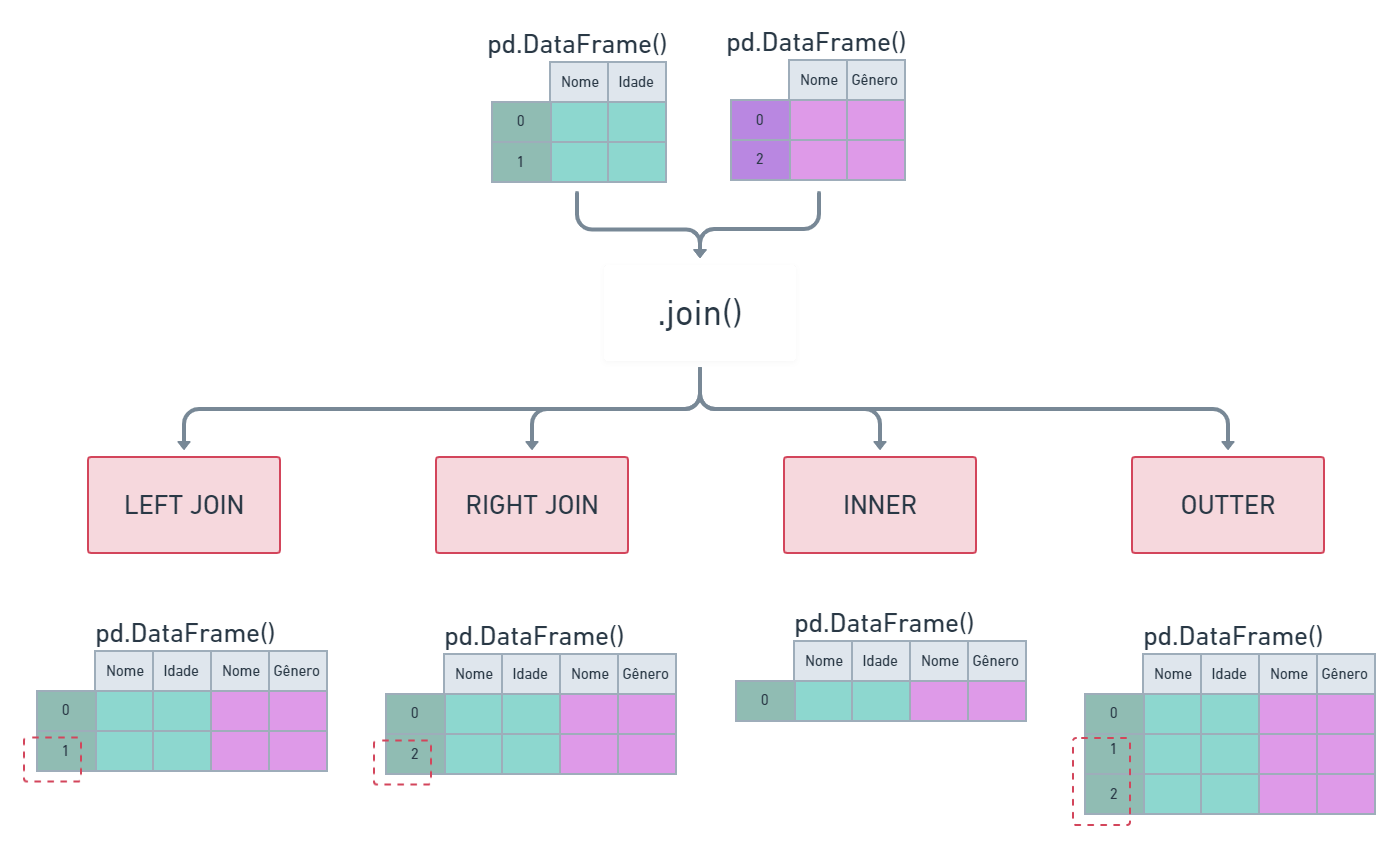

In [ ]:
esq = pd.DataFrame({"Nome": ["Ana", "Breno"],
                    "Idade": [22, 23]},
                    index=[0, 1]
                   )
esq

dir = pd.DataFrame({"Nome": ["Ana", "Carla"],
                    "Gênero": ["F", "F"]},
                    index=[0, 2]
                   )
dir

df = esq.join(dir,
              how="outer",
              lsuffix=" _ esq",
              rsuffix=" _ dir"
              )
df

,Nome _ esq,Idade,Nome _ dir,Gênero
0,Ana,22.0,Ana,F
1,Breno,23.0,NaN,NaN
2,NaN,NaN,Carla,F


### **`.merge()`**

O `.merge()` é bastante semelhante ao `.join()`, só que ele já não aceita listas ou objetos diferentes de outros `.DataFrames`. Com isso, ganha-se mais controle sobre alguns aspectos da junção. Mas para nossos usos, podemos considerar que são bem parecidos e só.

```python
.merge(right,
       how='inner',
       on=None,
       left_on=None,
       right_on=None,
       left_index=False,
       right_index=False,
       sort=False,
       suffixes=('_x', '_y'),
       copy=True,
       indicator=False,
       validate=None)
```

In [ ]:
?pd.DataFrame.merge()

In [ ]:
df1 = pd.DataFrame({'chave_esq': ['foo', 'bar', 'baz', 'foo'],
                    'valor': [1, 2, 3, 5]})

df2 = pd.DataFrame({'chave_dir': ['foo', 'bar', 'baz', 'foo'],
                    'valor': [5, 6, 7, 8]})

df1

,chave_esq,valor
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [ ]:
df2

,chave_dir,valor
0,foo,5
1,bar,6
2,baz,7
3,foo,8


Merge df1 and df2 on the lkey and rkey columns. The value columns have
the default suffixes, _x and _y, appended.

In [ ]:
df1.merge(df2, left_on='chave_esq', right_on='chave_dir')

,chave_esq,valor_x,chave_dir,valor_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


Merge DataFrames df1 and df2 with specified left and right suffixes
appended to any overlapping columns.

In [ ]:
df1.merge(df2,
          how="left",
          left_on='chave_esq',
          right_on='chave_dir',
          suffixes=('_esq', '_dir'))

,chave_esq,valor_esq,chave_dir,valor_dir
0,foo,1,foo,5
1,foo,1,foo,8
2,bar,2,bar,6
3,baz,3,baz,7
4,foo,5,foo,5
5,foo,5,foo,8


Entendendo o resultado acima: onde houve coincidência dos valores, eles foram combinados (gerando a quantidade de combinações possíveis).

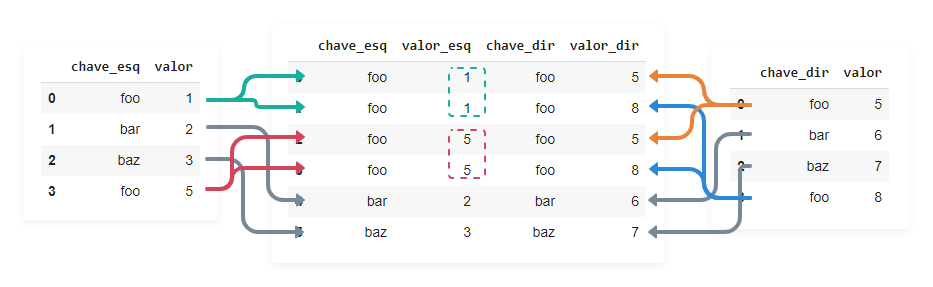

## Removendo dados do `pd.DataFrame`

### **`.drop()`**

In [ ]:
?pd.DataFrame.drop()

```python
pd.DataFrame.drop(labels=None, # nome ou lista de nomes da coluna ou da linha a descartar
                  axis=0, # {0 = colunas, 1 = linhas}
                  index=None,
                  columns=None,
                  level=None,
                  inplace=False,
                  errors='raise')
```

Com o `.drop()` conseguimos remover:
* uma coluna ou várias colunas inteiras
* uma linha ou várias linhas inteiras
* colunas inteiras com base em valores encontrados nelas
* linhas inteiras com base em valores encontrados nelas

#### Colunas inteiras

##### Modo 1

In [ ]:
# Criando tabela exemplo
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [ ]:
df.drop(['B', 'C'], axis=1)

,A,D
0,0,3
1,4,7
2,8,11


##### Modo 2

In [ ]:
# Criando tabela exemplo
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [ ]:
df.drop(columns=['B', 'C'])

,A,D
0,0,3
1,4,7
2,8,11


#### Linhas inteiras

In [ ]:
# Criando tabela exemplo
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


##### Pelo índice das linhas

In [ ]:
df.drop([0, 1])

,A,B,C,D
2,8,9,10,11


#### Pelos valores encontrado no `.DataFrame`

Como vimos, o comando drop elemina colunas ou linhas com base em seus nomes ou índices.

Portanto, para utilizar a funcionalidade de eliminar registros com base em uma condição, precisamos apenas aprender como "buscar" o(s) **índice(s)** ou **nome(s)** corretos com base em valores.

Os objetos `pd.DataFrame` tem dois **atributos** para isso, chamados `columns` e `index`.

Vejamos o exemplo de como descobrir o índice (nome) de uma coluna com base em um valor.

Se você fizer uma operação booleana `==` com um `.DataFrame`, o retorno será um dataframe (ou matriz) com valores `True` onde a condição for verdadeira e `False` onde for falso.

In [ ]:
df['A'] == 4

0    False
1     True
2    False
Name: A, dtype: bool

In [ ]:
df['A'] >= 6

0    False
1    False
2     True
Name: A, dtype: bool

Utilizando esse "filtro", conseguimos uma listagem das linhas:

In [ ]:
df[df['A'] == 4]

,A,B,C,D
1,4,5,6,7


Com o `.index` conseguimos obter o(s) índice(s):

In [ ]:
df[df['A'] == 4].index

Int64Index([1], dtype='int64')

Uma vez que para o comando `.drop()` precisamos apenas especificar um índice ou uma lista de índices, a solução está encontrada.

Basta passar esse "filtro" como parâmetro para o `.drop()`. Veja:

In [ ]:
df.drop(df[df['A'] >= 4].index)

,A,B,C,D
0,0,1,2,3


# Ler (carregar) e Escrever (salvar) arquivos de dados

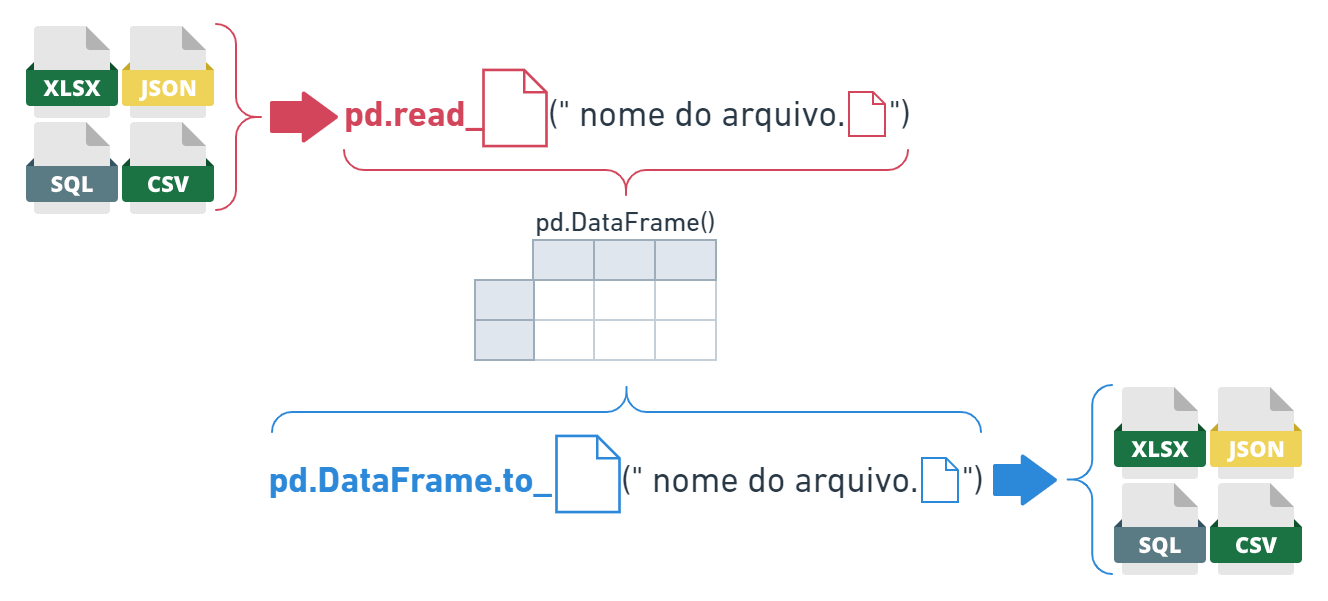

A principal e mais importante **diferença** entre as funções para ler e escrever no `pandas` é que:
* `pd.read_ ... ()` é uma função da **Classe** `pandas` e **não** do `.DataFrame`
* `pd.DataFrame.to_ ... ()` é uma função do **Objeto** `.DataFrame` e **não** da `Classe`

... ou seja, para **ler** utilizaremos algo tipo:
```python
df = pd.read_csv("nomedoarquivo.csv")
```
E para **escrever** utilizaremos algo tipo:
```python
df.to_csv("nomedoarquivo.csv")
```

Perceba que enquanto o `.read_csv()` está **"aplicado"** ao `pd` (que é o mesmo que a classe **`pandas`**), no último exemplo o `.to_csv()` está **"aplicado"** ao `df` (que é um **objeto** da classe **`pandas`** ou `pd`).

> É quase como se disséssemos: "`pandas`, leia o `arquivo.csv`, crie um objeto chamado `df` e armazene esses dados lidos nele.

E depois:

> É como se disséssemos: "quero que este `DataFrame` `df` seja escrito em `arquivo.csv`."

Então vamos a seus detalhes:

### **`pd.read_ ... ()`**

Para trazer dados de planilhas, arquivos ou outros protocolos (como JSON), utilizamos a "leitura" (_read_ do inglês).

O pandas hoje adotou o padrão `pd.read_[extensão do arquivo]()` como uma espécie de modelo.

Entendendo assim, já deixamos aqui quais que mais utilizaremos:
* `pd.read_csv()`
* `pd.read_excel()` (um dos que fogem um pouco do padrão)
* `pd.read_json()`
* `pd.read_sql()`
* `pd.read_html()`
* `pd.read_table()`

In [ ]:
# Utilizamos o comando abaixo para baixar o arquivo "dataset_titanic.csv" para
# dentro do nosso ambiente do colab
!curl -LJO https://raw.githubusercontent.com/cristiano-de-magalhaes/python_industria_4.0/main/dataset_titanic.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    14  100    14    0     0    109      0 --:--:-- --:--:-- --:--:--   108


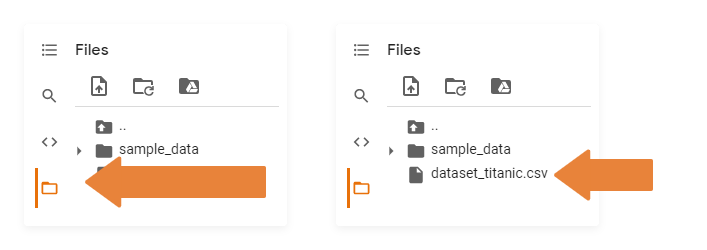

In [ ]:
# Agora vamos fazer sua leitura como acabamos de ver
arquivo = "dataset_titanic.csv"

df = pd.read_csv(arquivo,
                #   lines=True
                #  error_bad_lines=False,
                 )

Vejamos agora o nosso `df`

In [ ]:
df

,404: Not Found


#### **`.head()`** e **`tail()`**

In [ ]:
df.head() # mostra as 5 primeiras linhas do seu `.DataFrame`

In [ ]:
df.tail() # mostra as 5 últimas linhas do seu `.DataFrame`

Vamos apenas filtrar retirando os registros que estão incompletos.

Retiraremos as colunas com dados faltantes:

In [ ]:
df = df.dropna(axis=1) # axis=1 informa que é pra "procurar" apenas em colunas
df

Perceba que a quantidade de colunas caiu de 12 para 9 e que se dermos um `.dropna()` agora, nada muda pois os dados faltantes já foram eliminados.

In [ ]:
df.dropna()

### **`pd.DataFrame.to_ ... ()`**

Agora vamos salvar a lista "filtrada" no arquivo `.csv`.

De forma parecida, para gravar os dados de um `DataFrame` em planilhas, arquivos ou outros protocolos (como SQL), utilizamos a "escrita **para**" (_to_ do inglês).

O padrão neste caso é `pd.to_[extensão do arquivo]()` como "modelo".

Entendendo assim, já deixamos aqui quais que mais utilizaremos:
* `pd.to_csv()`
* `pd.to_excel()` (novamente fugindo um pouco do padrão)
* `pd.to_json()`
* `pd.to_sql()`
* `pd.to_html()`
* `pd.to_table()`

In [ ]:
df.to_csv("dataset_titanic_filtrado.csv")

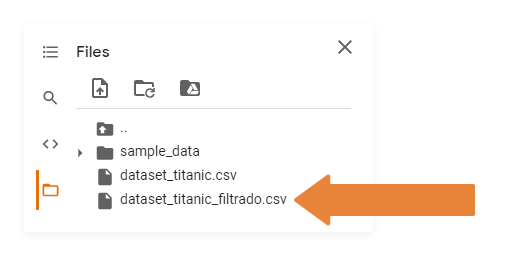

---

<!hidden
!jupyter nbconvert --to html Storyboard_Notebook_Python_para_a_Indústria_4_0_bib_pandas_v01r06.ipynb
>